In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Características del EDA con Neurokit2

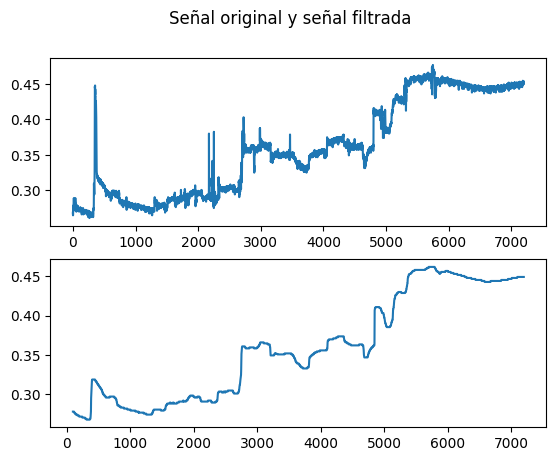

In [ ]:
import locale
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import pandas as pd

# Señal de entrada
url = '/content/drive/MyDrive/TFG/WESAD/EDA-10.csv'
datos = pd.read_csv(url)
datos.head(3)
#cogemos la columna 0
signal = datos.iloc[:,0]


#indicar que el separadro decimal es el punto
locale.setlocale(locale.LC_NUMERIC, 'en_US.UTF-8')

# Limpiar los valores eliminando el carácter ';'
#signal = signal.str.replace(';', '')

# Convertir la columna a tipo float
signal = signal.astype(float)

# Aplicar el filtro a la señal
filtered_signal = signal.rolling(window=100).median()

#crear dos graficas, una con la señal original y otra con la señal filtrada
fig, axs = plt.subplots(2)
fig.suptitle('Señal original y señal filtrada')
axs[0].plot(signal)
axs[1].plot(filtered_signal)






In [ ]:
pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 9.8 MB/s eta 0:00:00


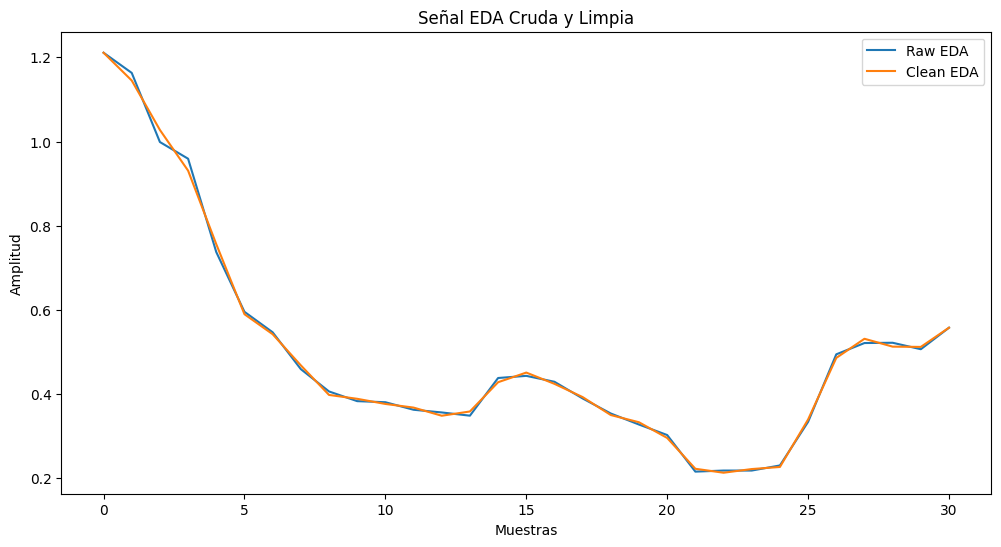

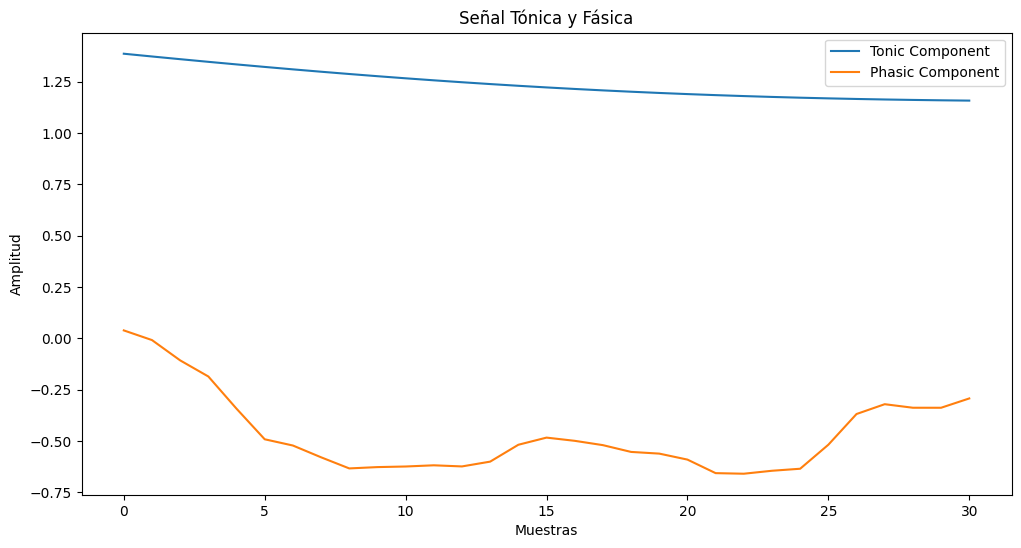

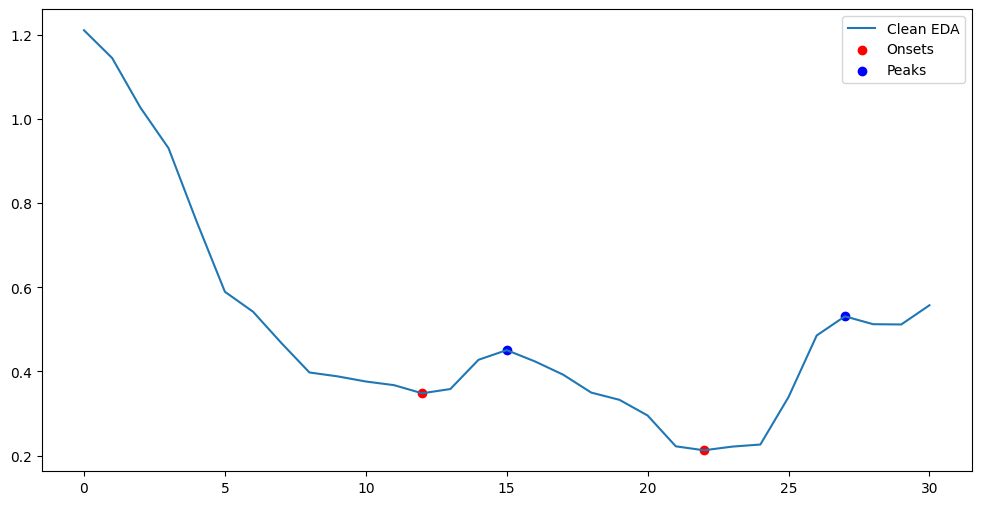

1.0

In [ ]:
#Gráfica de la señal EDA cruda y limpia
plt.figure(figsize=(12, 6))
plt.plot(signals["EDA_Raw"], label="Raw EDA")
plt.plot(signals["EDA_Clean"], label="Clean EDA")
plt.title("Señal EDA Cruda y Limpia")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

# Gráfica de la señal Tónica y Fásica
plt.figure(figsize=(12, 6))
plt.plot(signals["EDA_Tonic"], label="Tonic Component")
plt.plot(signals["EDA_Phasic"], label="Phasic Component")
plt.title("Señal Tónica y Fásica")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

# Gráfica de la señal EDA con puntos de onsets y offsets marcados
plt.figure(figsize=(12, 6))
plt.plot(signals["EDA_Clean"], label="Clean EDA")
plt.scatter(info["SCR_Onsets"], signals["EDA_Clean"].iloc[info["SCR_Onsets"]], c='r', marker='o', label="Onsets")
plt.scatter(info["SCR_Peaks"], signals["EDA_Clean"].iloc[info["SCR_Peaks"]], c='b', marker='o', label="Peaks")
plt.legend()
plt.show()


2 / 2


Text(0.5, 1.0, 'Señal EDA normalizada')

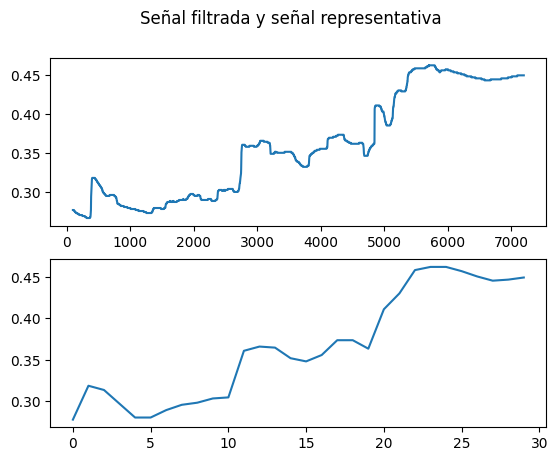

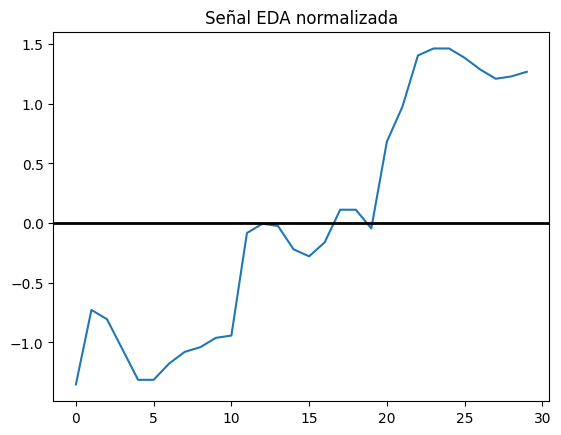

In [ ]:
from pyts.approximation import SymbolicAggregateApproximation

#AGREGACION
# ==============================================================================
# A partir de la señal filtrada, se crea una ventana deslizante de tamaño m= 240  muestras (medidas de 1 min)= y'
#se calcula el maximo de la ventana
#para cada valor y1,..,ym se le agrega un valor unico y''= max(y1,..,ym)

# Señal de entrada
url = '/content/drive/MyDrive/TFG/WESAD/EDA-10.csv'
datos = pd.read_csv(url)
datos.head(3)
#cogemos la columna 0
signal = datos.iloc[:,0]


#indicar que el separadro decimal es el punto
locale.setlocale(locale.LC_NUMERIC, 'en_US.UTF-8')

# Limpiar los valores eliminando el carácter ';'
#signal = signal.str.replace(';', '')

# Convertir la columna a tipo float
signal = signal.astype(float)

# Aplicar el filtro a la señal
filtered_signal = signal.rolling(window=100).median()

# Crear una ventana deslizante de tamaño m=240
# Supongamos que 'eda_filtrado' es la columna resultante después de aplicar el filtro mediano
# y que m = 240

# Crear una nueva ventana y'' de tamaño m
puntosRepresentativos = 30 # 30 puntos representativos
ventana = 240 # 240 muestras por ventana, que son las que se toman en un minuto
#se utilia la funcion groupby para agrupar los datos en ventanas de tamaño 240 y se calcula el maximo de cada ventana
representativos = filtered_signal.groupby(filtered_signal.index // ventana).max()

# imprimir la señal filtrada y la señal representativa

fig, axs = plt.subplots(2)
fig.suptitle('Señal filtrada y señal representativa')
axs[0].plot(filtered_signal)
axs[1].plot(representativos)

#normalizacion z de la señal representativa
# ==============================================================================
# Se normaliza la señal representativa para que tenga media 0 y desviación típica 1.
# Se resta la media y se divide por la desviación típica
media=representativos.mean()
desviacion=representativos.std()
normalizados=(representativos-media)/desviacion
# imprimir la señal representativa normalizada
#poner el eje x en el 0 del eje y
fig, ax = plt.subplots()
ax.plot(normalizados)
ax.axhline(0, color='black', lw=2)
#ponerle titulo a la grafica
ax.set_title('Señal EDA normalizada')



##Extracción de las características sin normalización

/usr/local/lib/python3.10/dist-packages/neurokit2/eda/eda_clean.py:105: NeuroKitWarning: EDA signal is sampled at very low frequency. Skipping filtering.
  warn(


         max      mean  max_peaks  std_riseTime  n_peaks  stress  id
0   0.281744  0.273766          1      0.032275        1       0  17
1   0.390149  0.308378          1      0.190767        4       0  17
2   0.308115  0.297850          0      0.000000        0       0  17
3   0.294155  0.283162          1      0.130037        2       0  17
4   0.278892  0.276836          1      0.016137        1       0  17
5   0.282897  0.277535          1      0.048412        1       0  17
6   0.289583  0.283986          1      0.050967        2       0  17
7   0.298565  0.290749          1      0.070109        3       0  17
8   0.298552  0.293518          1      0.103119        2       0  17
9   0.303412  0.296175          1      0.144277       10       0  17
10  0.304884  0.302509          0      0.000000        0       0  17
11  0.372815  0.348888          1      0.160409        8       0  17
12  0.367685  0.361875          1      0.070109        4       0  17
13  0.364073  0.351480          1 

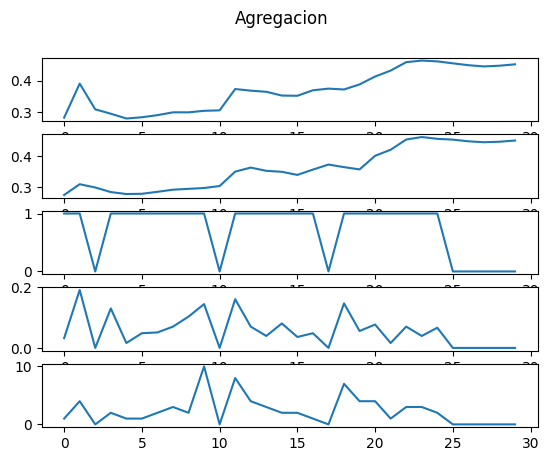

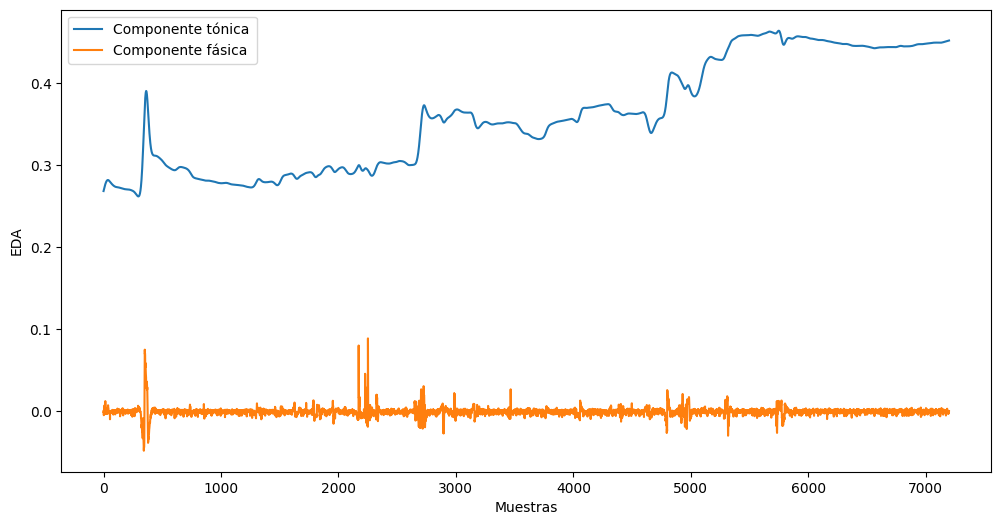

In [ ]:

import neurokit2 as nk
import locale
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import pandas as pd

#cojo la señal sin ruido (filtered signal) y la proceso con neurokit
# ==============================================================================
#señal de entrada
url = '/content/drive/MyDrive/TFG/WESAD/EDA-10.csv'
datos = pd.read_csv(url)

#columna 0
signal = datos.iloc[:,0]
#eliminamos ruido
#indicar que el separadro decimal es el punto
locale.setlocale(locale.LC_NUMERIC, 'en_US.UTF-8')

# Limpiar los valores eliminando el carácter ';'
#signal = signal.str.replace(';', '')
# Convertir la columna a tipo float
signal = signal.astype(float)

# Aplicar el filtro a la señal
filtered_signal = signal.rolling(window=100).median()

#procesamos la señal con neurokit
# ==============================================================================
#procesamos la señal con neurokit
signals, info = nk.eda_process(signal, sampling_rate=4)
#Metodo de agregacion, para cada ventana de 240 muestras, se calcula el maximo del eda_tonic, media del eda_tonic, maximo de phasic, std de phasic
# ==============================================================================
#seleccionamos las columnas que nos interesan
eda_tonic = signals['EDA_Tonic']
phasic = signals['EDA_Phasic']

#creamos una ventana de 240 muestras
ventana = 240
#agregamos los valores de la ventana
agregacion = eda_tonic.groupby(eda_tonic.index // ventana).agg(['max', 'mean'])
#añadimos agregacion del rise time y de peaks
#max of phasic (SCR)peaks and std of phasic (SCR) RISE TIME
agregacion['max_peaks'] = signals['SCR_Peaks'].groupby(signals['SCR_Peaks'].index // ventana).max()
agregacion['std_riseTime'] = signals['SCR_RiseTime'].groupby(signals['SCR_RiseTime'].index // ventana).std()
#number of peaks in phasic
agregacion['n_peaks'] = signals['SCR_Peaks'].groupby(signals['SCR_Peaks'].index // ventana).sum()
agregacion['stress']=[0]*20+[1]*10
agregacion['id']=[17]*30

print (agregacion)




#representacion grafica de la agregacion
# ==============================================================================
#graficamos la agregacion
fig, axs = plt.subplots(5)
fig.suptitle('Agregacion')
axs[0].plot(agregacion['max'])
axs[1].plot(agregacion['mean'])
axs[2].plot(agregacion['max_peaks'])
axs[3].plot(agregacion['std_riseTime'])
axs[4].plot(agregacion['n_peaks'])

# Gráfica de la señal Tónica y Fásica
plt.figure(figsize=(12, 6))
plt.plot(signals["EDA_Tonic"], label="Componente tónica")
plt.plot(signals["EDA_Phasic"], label="Componente fásica ")
#plt.title("Señal Tónica y Fásica")
plt.xlabel("Muestras")
plt.ylabel("EDA")
plt.legend()
plt.show()


##Extracción de las características con normalización

In [ ]:


import neurokit2 as nk
import locale
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import pandas as pd

#cojo la señal sin ruido (filtered signal) y la proceso con neurokit
# ==============================================================================
#señal de entrada
url = './WESAD/S17/EDA.csv'
datos = pd.read_csv(url)

#columna 0
signal = datos.iloc[:,0]
#eliminamos ruido
#indicar que el separadro decimal es el punto
locale.setlocale(locale.LC_NUMERIC, 'en_US.UTF-8')

# Limpiar los valores eliminando el carácter ';'
#signal = signal.str.replace(';', '')
# Convertir la columna a tipo float
signal = signal.astype(float)

# Aplicar la normalizacion a la señal
signal = (signal - signal.mean()) / signal.std()

#procesamos la señal con neurokit
# ==============================================================================
#procesamos la señal con neurokit
signals, info = nk.eda_process(signal, sampling_rate=4)
#Metodo de agregacion, para cada ventana de 240 muestras, se calcula el maximo del eda_tonic, media del eda_tonic, maximo de phasic, std de phasic
# ==============================================================================
#seleccionamos las columnas que nos interesan
eda_tonic = signals['EDA_Tonic']
phasic = signals['EDA_Phasic']

#creamos una ventana de 240 muestras
ventana = 240
#agregamos los valores de la ventana

agregacion = eda_tonic.groupby(eda_tonic.index // ventana).agg(['max', 'mean'])
agregacion['max_phasic'] = phasic.groupby(phasic.index // ventana).max()
agregacion['std_phasic'] = phasic.groupby(phasic.index // ventana).std()
#añadimos agregacion del rise time y de peaks
agregacion['rise_time'] = signals['SCR_RiseTime'].groupby(signals['SCR_RiseTime'].index // ventana).mean()
agregacion['peaks'] = signals['SCR_Peaks'].groupby(signals['SCR_Peaks'].index // ventana).sum()
agregacion['stress']=[0]*20+[1]*10

#AÑADIR LA IDENTIFICACION DE LA PERSONA
agregacion['id']=[17]*30


print (agregacion)


C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\neurokit2\eda\eda_clean.py:105: NeuroKitWarning: EDA signal is sampled at very low frequency. Skipping filtering.
  warn(


         max      mean  max_phasic  std_phasic  rise_time  peaks  stress  id
0   1.208327  1.094464    0.332221    0.095409   0.058577     15       0  17
1   1.408078  1.274319    0.344110    0.111178   0.087500     11       0  17
2   1.645393  1.437664    0.205895    0.074031   0.033333      7       0  17
3   1.740459  1.587257    0.437978    0.118319   0.040625      7       0  17
4   1.944849  1.780809    0.280953    0.072931   0.031250      6       0  17
5   1.753234  1.617136    0.178930    0.043015   0.022917      4       0  17
6   1.410449  1.220049    0.217241    0.044075   0.018750      2       0  17
7   1.247051  1.028500    0.039079    0.013427   0.004167      1       0  17
8   0.982248  0.846333    0.169079    0.035438   0.011458      3       0  17
9   0.709054  0.607294    0.089989    0.024000   0.013542      3       0  17
10  0.474176  0.434799    0.351398    0.048585   0.026042     10       0  17
11  0.380508  0.258713    0.049580    0.014973   0.002083      1       0  17

##Creación del '.csv'

In [ ]:
import neurokit2 as nk
import locale
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import pandas as pd


#añadirlo al finl del csv
fichero_csv= 'agregacion_Normalizacion.csv'

#agregacion.to_csv(fichero_csv, index=False)

with open (fichero_csv, 'a', newline='' ) as archivo_csv:
    agregacion.to_csv(archivo_csv, header=False, index=False)



datos =pd.read_csv(fichero_csv)
print(datos)









          max      mean  max_peaks  std_riseTime   n_peaks  stress  id
0   -0.197004 -0.235039  -1.124323     -1.012353 -0.874134       0   2
1   -0.567723 -0.517298  -1.124323     -1.012353 -0.874134       0   2
2   -0.697897 -0.637957  -1.124323     -1.012353 -0.874134       0   2
3    0.414562  0.025948   0.859777      1.925564  1.143098       0   2
4    0.573090  0.728098   0.859777      0.631031  0.336205       0   2
..        ...       ...        ...           ...       ...     ...  ..
446 -1.093619 -1.071713  -1.390444     -0.815886 -0.757370       1  17
447 -1.094338 -1.072470  -1.390444     -0.815886 -0.757370       1  17
448 -1.094404 -1.075168  -1.390444     -0.815886 -0.757370       1  17
449 -1.096204 -1.074456  -1.390444     -0.815886 -0.757370       1  17
450 -1.096524 -1.075263  -1.390444     -0.815886 -0.757370       1  17

[451 rows x 7 columns]


##Experimentos APRENDIZAJE AUTOMÁTICO CON WESAD

#CREACION DEL MODELO DE SVM TIPO EXPERIMENTO 1:

*   SIN NORMALIZACION

*   SEPARACION DE LOS DATOS EN TRAIN Y TEST EN 70 Y 30







In [ ]:

# ==============================================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#ABRIR EL CSV
# ==============================================================================
fichero_csv= 'agregacion.csv'
datos =pd.read_csv(fichero_csv)


#SEPARAMOS LOS DATOS EN TRAIN Y TEST
# ==============================================================================
X = datos.iloc[:,0:-2]
y = datos.iloc[:,-2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#CREAMOS EL MODELO
# ==============================================================================
modelo = SVC(kernel='linear')

#ENTRENAMOS EL MODELO
# ==============================================================================
modelo.fit(X_train, y_train)

#PREDICCION
# ==============================================================================
modelo.predict(X_test)

#EVALUACION DEL MODELO
# ==============================================================================
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')









Accuracy: 0.74


#CREACION DEL MODELO DE SVM TIPO EXPERIMENTO 2



*   CON NORMALIZACION DESPUES DE EXTRAER LOS FEATURES
*   SEPARACION DE LOS DATOS EN TRAIN Y TEST EN 70 Y 30





In [ ]:

# =============================================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#ABRIR EL CSV
# ==============================================================================
fichero_csv= 'agregacion_Normalizacion.csv'
datos =pd.read_csv(fichero_csv)


#SEPARAMOS LOS DATOS EN TRAIN Y TEST
# ==============================================================================
X = datos.iloc[:,0:-2]
y = datos.iloc[:,-2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#CREAMOS EL MODELO
# ==============================================================================
modelo = SVC(kernel='linear')

#ENTRENAMOS EL MODELO
# ==============================================================================
modelo.fit(X_train, y_train)

#PREDICCION
# ==============================================================================
modelo.predict(X_test)

#EVALUACION DEL MODELO
# ==============================================================================
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.79


#CREACION DEL MODELO DE SVM TIPO EXPERIMENTO 3
* SIN NORMALIZACION
* SEPARACION DE LOS DATOS USANDO LEAVE ONE GROUP OUT



Accuracy: 0.83 Sujeto de test: [2]
Accuracy: 0.87 Sujeto de test: [3]
Accuracy: 0.40 Sujeto de test: [4]
Accuracy: 0.63 Sujeto de test: [5]
Accuracy: 0.97 Sujeto de test: [6]
Accuracy: 0.87 Sujeto de test: [7]
Accuracy: 0.87 Sujeto de test: [8]
Accuracy: 0.61 Sujeto de test: [9]
Accuracy: 0.73 Sujeto de test: [10]
Accuracy: 0.90 Sujeto de test: [11]
Accuracy: 0.80 Sujeto de test: [13]
Accuracy: 0.47 Sujeto de test: [14]
Accuracy: 0.43 Sujeto de test: [15]
Accuracy: 0.37 Sujeto de test: [16]
Accuracy: 0.87 Sujeto de test: [17]
Accuracy(media): 0.7075
Accuracy (mediana): 0.8000


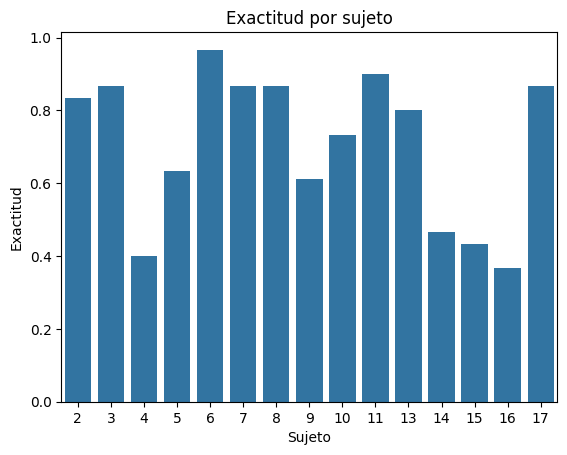

In [ ]:

# ==============================================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneGroupOut

#ABRIR EL CSV
# ==============================================================================
fichero_csv= '/content/drive/MyDrive/TFG/agregacion.csv'
datos =pd.read_csv(fichero_csv)

#SEPARAMOS LOS DATOS EN TRAIN Y TEST
# ==============================================================================

X = datos.iloc[:,0:-2]
y = datos.iloc[:,-2]

#SEPARACION EN TRAIN Y TEST
# ==============================================================================
grupos = datos['id']
logo = LeaveOneGroupOut()
accuracy = []
for train_index, test_index in logo.split(X, y, grupos):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    modelo = SVC(kernel='linear')
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f} Sujeto de test: {grupos.iloc[test_index].unique()}')
accuracy = np.array(accuracy)
print(f'Accuracy(media): {accuracy.mean():.4f}')
print(f'Accuracy (mediana): {np.median(accuracy):.4f}')

#MOSTRAR UN GRAFICO DE BARRAS CON EL ACCURACY DE CADA SUJETO
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.barplot(x=grupos.unique(), y=accuracy, ax=ax)
ax.set_title('Exactitud por sujeto')
ax.set_xlabel('Sujeto')
ax.set_ylabel('Exactitud')
plt.show()


#CREACION DEL MODELO DE SVM TIPO EXPERIMENTO 4
* CON NORMALIZACION
* SEPARACION DE LOS DATOS USANDO LEAVE ONE GROUP OUT

Accuracy: 0.83 Sujeto de test: [2]
Accuracy: 0.87 Sujeto de test: [3]
Accuracy: 0.67 Sujeto de test: [4]
Accuracy: 0.60 Sujeto de test: [5]
Accuracy: 0.97 Sujeto de test: [6]
Accuracy: 0.87 Sujeto de test: [7]
Accuracy: 0.87 Sujeto de test: [8]
Accuracy: 0.61 Sujeto de test: [9]
Accuracy: 0.57 Sujeto de test: [10]
Accuracy: 0.90 Sujeto de test: [11]
Accuracy: 0.80 Sujeto de test: [13]
Accuracy: 0.47 Sujeto de test: [14]
Accuracy: 0.37 Sujeto de test: [15]
Accuracy: 0.37 Sujeto de test: [16]
Accuracy: 0.87 Sujeto de test: [17]
Accuracy(media): 0.7075
Accuracy (mediana): 0.8000


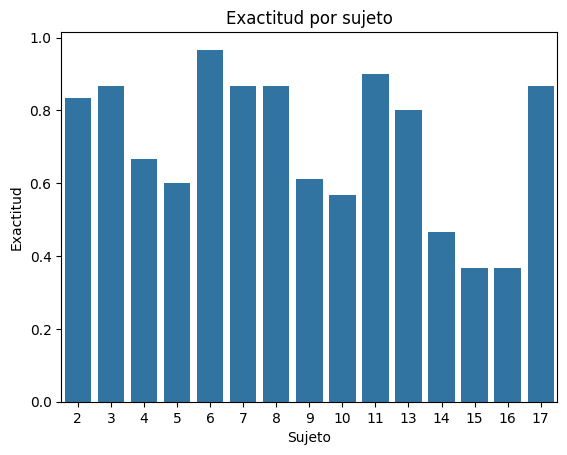

In [ ]:

# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneGroupOut


#ABRIR EL CSV
# ==============================================================================
fichero_csv= '/content/drive/MyDrive/TFG/agregacion_Normalizacion.csv'
datos =pd.read_csv(fichero_csv)

#SEPARAMOS LOS DATOS EN TRAIN Y TEST
# ==============================================================================

X = datos.iloc[:,0:-2]
y = datos.iloc[:,-2]

#SEPARACION EN TRAIN Y TEST
# ==============================================================================
grupos = datos['id']
logo = LeaveOneGroupOut()
accuracy = []
modelo = SVC(kernel='linear')

for train_index, test_index in logo.split(X, y, grupos):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f} Sujeto de test: {grupos.iloc[test_index].unique()}')
accuracy = np.array(accuracy)
print(f'Accuracy(media): {accuracy.mean():.4f}')
print(f'Accuracy (mediana): {np.median(accuracy):.4f}')


#MOSTRAR UN GRAFICO DE BARRAS CON EL ACCURACY DE CADA SUJETO
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.barplot(x=grupos.unique(), y=accuracy, ax=ax)
ax.set_title('Exactitud por sujeto')
ax.set_xlabel('Sujeto')
ax.set_ylabel('Exactitud')
plt.show()




#CREACION DEL MODELO DE SVM TIPO EXPERIMENTO 5
* CON NORMALIZACION
* SEPARACION DE LOS DATOS USANDO LEAVE ONE GROUP OUT Y CROSS VALIDATION



In [ ]:

# ==============================================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

#ABRIR EL CSV
# ==============================================================================

fichero_csv= '/content/drive/MyDrive/TFG/agregacion_Normalizacion.csv'
datos =pd.read_csv(fichero_csv)

#SEPARAMOS LOS DATOS EN TRAIN Y TEST
# ==============================================================================
X = datos.iloc[:,0:-2]
y = datos.iloc[:,-2]

#DEFINIMOS CROSS VALIDATION
# ==============================================================================
cv= LeaveOneOut()

#CREAMOS EL MODELO
# ==============================================================================
modelo = SVC(kernel='linear', coef0=1)

#Entrenamos el modelo
modelo.fit(X, y)

#UTILIZAMOS LOOCV PARA EVALUAR EL MODELO
# ==============================================================================
scores = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1)

#MOSTRAMOS LOS RESULTADOS
# ==============================================================================
print(f'Accuracy(media): {scores.mean():.2f}')






Accuracy(media): 0.73


##MATRIZ DE CONFUSIÓN

Accuracy(media): 0.73


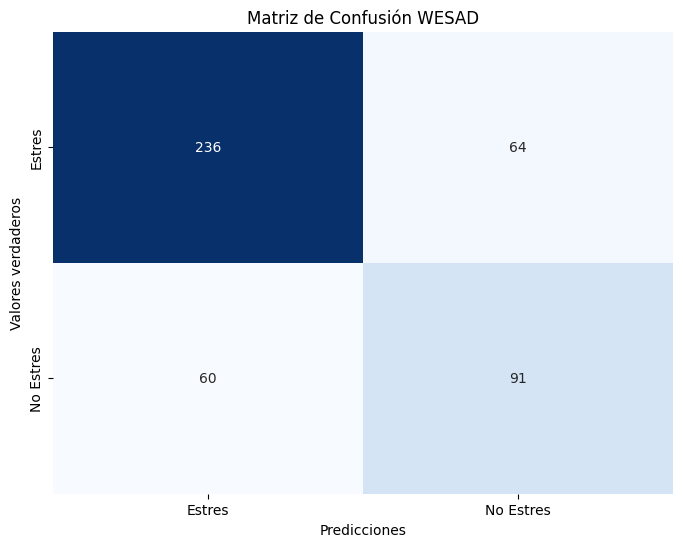

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ABRIR EL CSV
# ==============================================================================
fichero_csv = '/content/drive/MyDrive/TFG/agregacion_Normalizacion.csv'
datos = pd.read_csv(fichero_csv)

# SEPARAMOS LOS DATOS EN FEATURES Y LABELS
# ==============================================================================
X = datos.iloc[:, 0:-2]
y = datos.iloc[:, -2]

# DEFINIMOS CROSS VALIDATION
# ==============================================================================
cv = LeaveOneOut()

# CREAMOS EL MODELO
# ==============================================================================
modelo = SVC(kernel='linear', coef0=1)

# UTILIZAMOS LOOCV PARA EVALUAR EL MODELO
# ==============================================================================
scores = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1)

# MOSTRAMOS LOS RESULTADOS
# ==============================================================================
print(f'Accuracy(media): {scores.mean():.2f}')

# OBTENEMOS LAS PREDICCIONES USANDO CROSS VAL PREDICT PARA LA MATRIZ DE CONFUSIÓN
# ==============================================================================
y_pred = cross_val_predict(modelo, X, y, cv=cv, n_jobs=-1)

# CALCULAR LA MATRIZ DE CONFUSIÓN
# ==============================================================================
conf_mat = confusion_matrix(y, y_pred)

# CREAR UN HEATMAP DE LA MATRIZ DE CONFUSIÓN CON NOMBRES DE CATEGORÍAS
# ==============================================================================
categorias = ["Estres", "No Estres"]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=categorias, yticklabels=categorias)
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión WESAD')
plt.show()


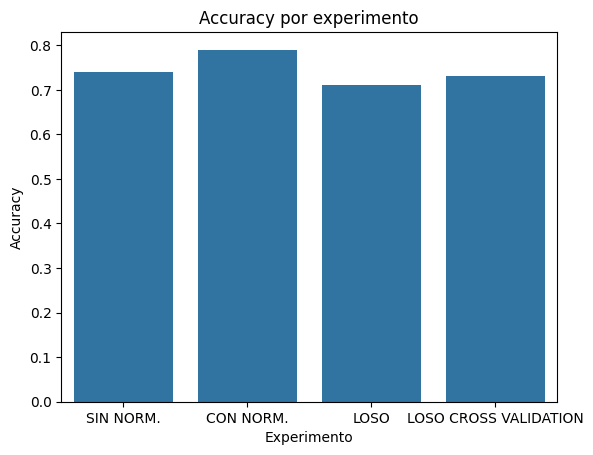

In [ ]:
#mostrar un grafico de barras con los 3 accuracy obtenidos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.barplot(x=['SIN NORM.', 'CON NORM.', 'LOSO', 'LOSO CROSS VALIDATION'], y=[0.74, 0.79, 0.71, 0.73], ax=ax)
ax.set_title('Accuracy por experimento')
ax.set_xlabel('Experimento')
ax.set_ylabel('Accuracy')
plt.show()


#BOSQUES ALEATORIOS, EXPERIMENTO 1
* SIN NORMALIZACIÓN
* SEPARACION DE LOS DATOS EN TRAIN Y TEST EN 70 Y 30

In [ ]:

# ==============================================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneGroupOut

#ABRIR EL CSV
# ==============================================================================
fichero_csv= 'agregacion.csv'
datos =pd.read_csv(fichero_csv)

#SEPARAMOS LOS DATOS EN TRAIN Y TEST
# ==============================================================================
X = datos.iloc[:,0:-2]
y = datos.iloc[:,-2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#CREAMOS EL MODELO
# ==============================================================================
modelo = RandomForestClassifier(n_estimators=700, random_state=0)

#ENTRENAMOS EL MODELO
# ==============================================================================
modelo.fit(X_train, y_train)

#PREDICCION
# ==============================================================================
modelo.predict(X_test)

#EVALUACION DEL MODELO
# ==============================================================================
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')




Accuracy: 0.71


#BOSQUES ALEATORIOS EXPERIMENTO 2
* CON NORMALIZACIÓN
* SEPARACION DE LOS DATOS EN TRAIN Y TEST EN 70 Y 30


In [ ]:


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneGroupOut

#ABRIR EL CSV
# ==============================================================================
fichero_csv= 'agregacion_Normalizacion.csv'
datos =pd.read_csv(fichero_csv)

#SEPARAMOS LOS DATOS EN TRAIN Y TEST
# ==============================================================================
X = datos.iloc[:,0:-2]
y = datos.iloc[:,-2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#CREAMOS EL MODELO
# ==============================================================================
modelo = RandomForestClassifier(n_estimators=700, random_state=0)

#ENTRENAMOS EL MODELO
# ==============================================================================
modelo.fit(X_train, y_train)

#PREDICCION
# ==============================================================================
modelo.predict(X_test)

#EVALUACION DEL MODELO
# ==============================================================================
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.84


#BOSQUES ALEATORIOS, EXPERIMENTO 3
* SIN NORMALIZACIÓN
* SEPARACION DE LOS DATOS USANDO LEAVE ONE GROUP OUT

Accuracy: 0.77 Sujeto de test: [2]
Accuracy: 0.67 Sujeto de test: [3]
Accuracy: 0.43 Sujeto de test: [4]
Accuracy: 0.63 Sujeto de test: [5]
Accuracy: 0.67 Sujeto de test: [6]
Accuracy: 0.90 Sujeto de test: [7]
Accuracy: 0.57 Sujeto de test: [8]
Accuracy: 0.71 Sujeto de test: [9]
Accuracy: 0.57 Sujeto de test: [10]
Accuracy: 0.63 Sujeto de test: [11]
Accuracy: 0.80 Sujeto de test: [13]
Accuracy: 0.47 Sujeto de test: [14]
Accuracy: 0.13 Sujeto de test: [15]
Accuracy: 0.50 Sujeto de test: [16]
Accuracy: 0.60 Sujeto de test: [17]
Accuracy(media): 0.60
Accuracy (mediana): 0.63


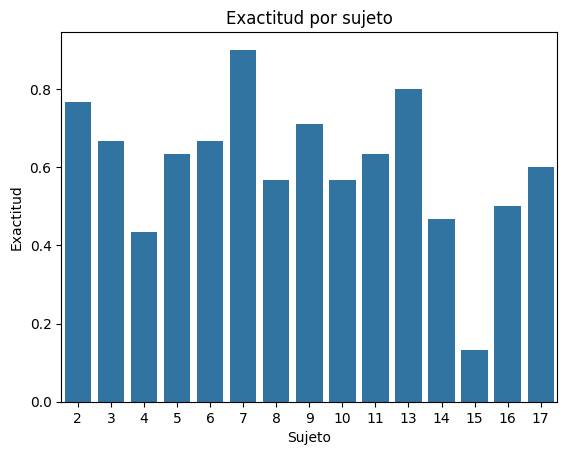

In [ ]:

# ==============================================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneGroupOut

#ABRIR EL CSV
# ==============================================================================
fichero_csv= '/content/drive/MyDrive/TFG/agregacion.csv'
datos =pd.read_csv(fichero_csv)

#SEPARAMOS LOS DATOS EN TRAIN Y TEST
# ==============================================================================
X = datos.iloc[:,0:-2]
y = datos.iloc[:,-2]

#SEPARACION EN TRAIN Y TEST
# ==============================================================================
grupos = datos['id']
logo = LeaveOneGroupOut()
accuracy = []
modelo = RandomForestClassifier(n_estimators=700, random_state=0)


for train_index, test_index in logo.split(X, y, grupos):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f} Sujeto de test: {grupos.iloc[test_index].unique()}')
accuracy = np.array(accuracy)
print(f'Accuracy(media): {accuracy.mean():.2f}')
print(f'Accuracy (mediana): {np.median(accuracy):.2f}')


#MOSTRAR UN GRAFICO DE BARRAS CON EL ACCURACY DE CADA SUJETO
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.barplot(x=grupos.unique(), y=accuracy, ax=ax)
ax.set_title('Exactitud por sujeto')
ax.set_xlabel('Sujeto')
ax.set_ylabel('Exactitud')
plt.show()


#BOSQUES ALEATORIOS, EXPERIMENTO 4
* CON NORMALIZACIÓN
* SEPARACION DE LOS DATOS USANDO LEAVE ONE GROUP OUT

Accuracy: 0.97 Sujeto de test: [2]
Accuracy: 1.00 Sujeto de test: [3]
Accuracy: 0.63 Sujeto de test: [4]
Accuracy: 0.67 Sujeto de test: [5]
Accuracy: 0.97 Sujeto de test: [6]
Accuracy: 0.83 Sujeto de test: [7]
Accuracy: 1.00 Sujeto de test: [8]
Accuracy: 0.65 Sujeto de test: [9]
Accuracy: 0.40 Sujeto de test: [10]
Accuracy: 0.93 Sujeto de test: [11]
Accuracy: 0.67 Sujeto de test: [13]
Accuracy: 0.67 Sujeto de test: [14]
Accuracy: 0.50 Sujeto de test: [15]
Accuracy: 0.43 Sujeto de test: [16]
Accuracy: 0.93 Sujeto de test: [17]
Accuracy(media): 0.75
Accuracy (mediana): 0.67


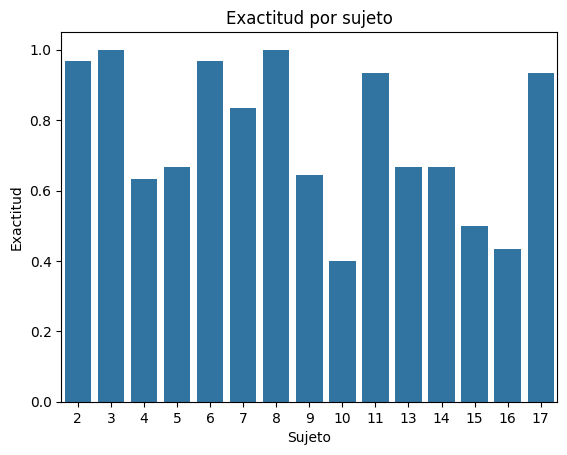

In [ ]:

# ==============================================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneGroupOut

#ABRIR EL CSV
# ==============================================================================
fichero_csv= '/content/drive/MyDrive/TFG/agregacion_Normalizacion.csv'
datos =pd.read_csv(fichero_csv)

#SEPARAMOS LOS DATOS EN TRAIN Y TEST
# ==============================================================================
X = datos.iloc[:,0:-2]
y = datos.iloc[:,-2]

#SEPARACION EN TRAIN Y TEST
# ==============================================================================
grupos = datos['id']
logo = LeaveOneGroupOut()
accuracy = []
modelo = RandomForestClassifier(n_estimators=700, random_state=0)

for train_index, test_index in logo.split(X, y, grupos):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f} Sujeto de test: {grupos.iloc[test_index].unique()}')
accuracy = np.array(accuracy)
print(f'Accuracy(media): {accuracy.mean():.2f}')
print(f'Accuracy (mediana): {np.median(accuracy):.2f}')

#MOSTRAR UN GRAFICO DE BARRAS CON EL ACCURACY DE CADA SUJETO
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.barplot(x=grupos.unique(), y=accuracy, ax=ax)
ax.set_title('Exactitud por sujeto')
ax.set_xlabel('Sujeto')
ax.set_ylabel('Exactitud')
plt.show()


#BOSQUES ALEATORIOS, EXPERIMENTO 5 + MATRIZ DE CONFUSIÓN
* CON NORMALIZACIÓN
* SEPARACION DE LOS DATOS USANDO LEAVE ONE GROUP OUT

Accuracy(media): 0.85
Accuracy(mediana): 1.00


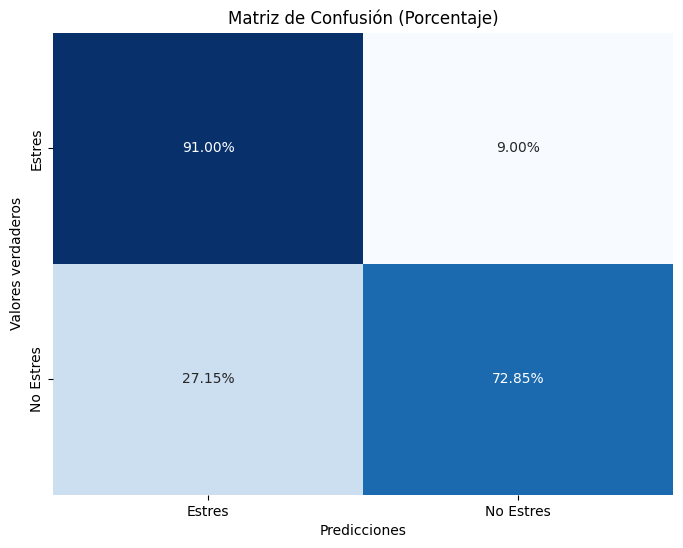

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ABRIR EL CSV
# ==============================================================================
fichero_csv = '/content/drive/MyDrive/TFG/agregacion_Normalizacion.csv'
datos = pd.read_csv(fichero_csv)

# SEPARAMOS LOS DATOS EN FEATURES Y LABELS
# ==============================================================================
X = datos.iloc[:, 0:-2]
y = datos.iloc[:, -2]


# DEFINIMOS CROSS VALIDATION
# ==============================================================================
cv = LeaveOneOut()

# CREAMOS EL MODELO
# ==============================================================================
modelo = RandomForestClassifier(n_estimators=700, random_state=0)

# UTILIZAMOS LOOCV PARA EVALUAR EL MODELO
# ==============================================================================
scores = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1)

# OBTENEMOS LAS PREDICCIONES USANDO CROSS VAL PREDICT PARA LA MATRIZ DE CONFUSIÓN
# ==============================================================================
y_pred = cross_val_predict(modelo, X, y, cv=cv, n_jobs=-1)

# MOSTRAMOS LOS RESULTADOS
# ==============================================================================
print(f'Accuracy(media): {scores.mean():.2f}')
print(f'Accuracy(mediana): {np.median(scores):.2f}')

# CALCULAR LA MATRIZ DE CONFUSIÓN
# ==============================================================================
conf_mat = confusion_matrix(y, y_pred)

# CALCULAR LOS PORCENTAJES
# ==============================================================================
conf_mat_porcentaje = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

# CREAR UN HEATMAP DE LA MATRIZ DE CONFUSIÓN CON NOMBRES DE CATEGORÍAS
# ==============================================================================
categorias = ["Estres", "No Estres"]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_porcentaje, annot=True, fmt='.2%', cmap='Blues', cbar=False, xticklabels=categorias, yticklabels=categorias)
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión (Porcentaje)')
plt.show()



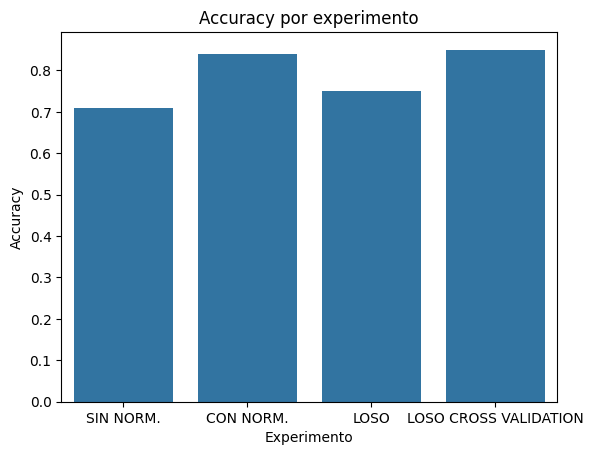

In [ ]:
#mostrar un grafico de barras con los 3 accuracy obtenidos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.barplot(x=['SIN NORM.', 'CON NORM.','LOSO', 'LOSO CROSS VALIDATION'], y=[0.71, 0.84, 0.75, 0.85], ax=ax)
ax.set_title('Accuracy por experimento')
ax.set_xlabel('Experimento')
ax.set_ylabel('Accuracy')
plt.show()

